In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load

%autosave 0 

Autosave disabled


In [3]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                                
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))
def viterbi(obs,Modelo1,PI):
    A, B= Modelo1.A , Modelo1.B
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)



In [4]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [5]:
both=False
data=pd.read_csv('dataset_candidatura_wr/lecs_odom.txt')#'dataset_candidatura_wr/lecs_odom(goodman).txt'
data2=pd.read_csv('dataset_candidatura_wr/lecs_odom(short distance).txt')
data3=pd.read_csv('dataset_candidatura_wr/lecs_odom(short distance).txt')
#data=data2
#data=data.iloc[:30000,:]

cols=['x','y','theta']
n_reads=data.shape[1]-3
n_reads
etiquetas=[]
for i in range (n_reads):
    etiquetas.append('R'+str(i))

        
for lab in cols:
    etiquetas.append(lab)
data.columns=etiquetas

if both:
    

    data2.columns,data3.columns=etiquetas,etiquetas
    data=pd.concat((data,data2,data3))
    

"""if (only_nice!=True):
    print("NOT ONLY NICE")
    data2=pd.read_csv('lecturasconodometria.txt')
    data2.columns=etiquetas
    data3= pd.concat((data,data2))
    data=data3

"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs,0,10)
data.iloc[:,0:n_reads]=lecs

data.describe()



,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R714,R715,R716,R717,R718,R719,R720,x,y,theta
count,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,...,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000,16636.000000
mean,1.283802,1.278949,1.273587,1.267605,1.264366,1.259350,1.258843,1.257938,1.259580,1.258526,...,1.774730,1.777663,1.783051,1.788151,1.793184,1.796114,1.797622,0.882818,0.313311,-0.062106
std,1.262733,1.257315,1.251964,1.246630,1.242779,1.235497,1.231355,1.223569,1.219315,1.213571,...,0.286923,0.287473,0.287562,0.288161,0.288366,0.287099,0.285168,0.265067,0.268828,0.130434
min,0.619724,0.617433,0.614994,0.610113,0.608203,0.606325,0.604479,0.588059,0.586709,0.582629,...,0.916089,0.918935,0.921873,0.924811,0.927832,0.930928,0.934100,0.391806,-0.298491,-0.836330
25%,0.867291,0.867990,0.869736,0.871442,0.875719,0.878702,0.884149,0.887303,0.890011,0.890803,...,1.534904,1.541575,1.547012,1.552013,1.557936,1.563685,1.569991,0.690474,0.096400,-0.099504
50%,1.171063,1.166575,1.162258,1.156258,1.153434,1.148222,1.146861,1.143667,1.140494,1.137051,...,1.775286,1.775428,1.780809,1.785938,1.791185,1.792875,1.791655,0.863944,0.308546,-0.040769
75%,1.331653,1.329580,1.327455,1.322388,1.315737,1.308821,1.303385,1.299687,1.297513,1.296728,...,2.042453,2.044592,2.050790,2.058787,2.068016,2.072591,2.072505,1.144025,0.560240,0.006072
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,2.288977,2.298274,2.298131,2.303707,2.302214,2.304303,2.306051,1.359075,0.811168,0.153433


In [6]:
get_new_ccs=False
Q_aff=True
if get_new_ccs:
    
    K_corpus=256
    N=16
    
    kmedias=MiniBatchKMeans(init='k-means++', n_clusters=K_corpus, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    kmedias.fit(lecs)
    ccvk=kmedias.cluster_centers_
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=N, batch_size=1000,
                      n_init=10, max_no_improvement=10, verbose=0)
    mbk.fit(xyth)
    ccxyth=mbk.cluster_centers_
else:
    ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
    print("CUANTIZANDO SIN RECALCULAR CC")
aus=[]
auvks=[]
for i,lec in zip(xyth.values, lecs.values):
    _, au= quantized(i , ccxyth)
    aus.append(au)

    auvk= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
    auvks.append(auvk)


if (Q_aff==True):
    clf=load('aff_prop_class.joblib_2') ##PYTHON VERSION 2 
    data['Vk_aff']=clf.predict(lecs)
if (Q_aff!=True):
    data['Vk_aff']=data['Vk']

data['Y']=aus
data['Vk']=auvks
obs,est= data['Vk'].values,data['Y'].values
obs_aff= data['Vk_aff'].values
np.save('obs.npy',obs)
np.save('est.npy',est)
np.save ('ccxyth.npy',ccxyth)
np.save ('ccvk.npy',ccvk)
data.to_csv('pddata.csv')    
print('new obs/ est almacenados')
data['Y'].describe()   

CUANTIZANDO SIN RECALCULAR CC


/home/oscar/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.affinity_propagation_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/oscar/.local/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator AffinityPropagation from version 0.19.1 when using version 0.22.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


new obs/ est almacenados


count    16636.000000
mean        10.504388
std          3.043327
min          6.000000
25%          6.000000
50%         11.000000
75%         13.000000
max         15.000000
Name: Y, dtype: float64

In [7]:
new_xyth=False
if new_xyth:

    xyth_symbols=data[['x','y','theta','Vk','Vk_aff']]
    mbk.fit(xyth_symbols)
    ccxyth_symbols=mbk.cluster_centers_
    ccxyth=ccxyth_symbols[:,:3]
    data.Y=mbk.labels_
    est= data['Y'].values



In [8]:
save=False

In [9]:
data

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
0,1.439873,1.457068,1.388784,1.368509,1.358870,1.350896,1.345730,1.342129,1.338672,1.335278,...,1.479520,1.485237,1.491049,1.496958,0.500674,0.807243,0.077393,82,6,242
1,1.442690,1.459906,1.384591,1.367086,1.358375,1.350654,1.345837,1.342313,1.338853,1.335456,...,1.479231,1.484944,1.490752,1.496656,0.503185,0.807391,0.077203,82,6,242
2,1.446273,1.463540,1.380478,1.366086,1.357449,1.350385,1.345814,1.342292,1.338833,1.335438,...,1.479275,1.484990,1.490800,1.496706,0.503965,0.807437,0.077207,82,6,242
3,1.449046,1.466336,1.379191,1.365638,1.356969,1.350382,1.345989,1.342464,1.339003,1.335605,...,1.479046,1.484757,1.490563,1.496466,0.504874,0.807432,0.076945,82,6,242
4,1.451882,1.469199,1.377713,1.365083,1.356489,1.350321,1.346124,1.342596,1.339134,1.335734,...,1.478857,1.484565,1.490369,1.496269,0.506435,0.807583,0.076968,82,6,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16631,1.347475,1.361564,1.375997,1.390788,1.405948,1.421492,1.437433,1.453785,1.470564,1.487786,...,1.693726,1.699522,1.705416,1.711410,1.266699,0.352460,-0.051533,156,11,14
16632,1.347509,1.361600,1.376035,1.390828,1.405991,1.421536,1.437479,1.453834,1.470616,1.487840,...,1.691278,1.697067,1.702953,1.708938,1.266800,0.354687,-0.051569,156,11,14
16633,1.347528,1.361621,1.376058,1.390852,1.406017,1.421564,1.437509,1.453866,1.470649,1.487876,...,1.688808,1.694589,1.700467,1.706444,1.266922,0.357218,-0.051528,156,11,14
16634,1.347431,1.361521,1.375957,1.390751,1.405914,1.421460,1.437403,1.453758,1.470540,1.487766,...,1.686295,1.692067,1.697936,1.703904,1.266975,0.358297,-0.051513,156,11,14


In [10]:
####BAUM WELCH APPROX###############???!?!?!
if save:
    N=est.max()+1 
    K_corpus= obs.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est)+.00001)

    A,B=TRANS,EMIS
    PI=np.ones(N)/N
    Modelo1=HMM(A,B,PI)




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
    Modelo1=HMM(A,B,PI)
B.shape

(16, 256)

In [11]:
obs2=data.Vk_aff.values
if save:
    ####BAUM WELCH APPROX  AFF PROP###############???!?!?!
    
    N=est.max()+1 
    K_corpus= obs2.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs2==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est))

    A,B=TRANS,EMIS
    PI=np.ones(N)/N

    Modelo2= HMM(A,B,PI)
    Modelo2.B=B
    Modelo2.A=A




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A2.npy',Modelo2.A)
    np.save('B2.npy',Modelo2.B)
    np.save('PI2.npy',Modelo2.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A2.npy'),np.load('B2.npy'),np.load('PI2.npy')
    Modelo2=HMM(A,B,PI)
B.shape

(16, 189)

In [12]:
data.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
0,1.439873,1.457068,1.388784,1.368509,1.358870,1.350896,1.345730,1.342129,1.338672,1.335278,...,1.479520,1.485237,1.491049,1.496958,0.500674,0.807243,0.077393,82,6,242
1,1.442690,1.459906,1.384591,1.367086,1.358375,1.350654,1.345837,1.342313,1.338853,1.335456,...,1.479231,1.484944,1.490752,1.496656,0.503185,0.807391,0.077203,82,6,242
2,1.446273,1.463540,1.380478,1.366086,1.357449,1.350385,1.345814,1.342292,1.338833,1.335438,...,1.479275,1.484990,1.490800,1.496706,0.503965,0.807437,0.077207,82,6,242
3,1.449046,1.466336,1.379191,1.365638,1.356969,1.350382,1.345989,1.342464,1.339003,1.335605,...,1.479046,1.484757,1.490563,1.496466,0.504874,0.807432,0.076945,82,6,242
4,1.451882,1.469199,1.377713,1.365083,1.356489,1.350321,1.346124,1.342596,1.339134,1.335734,...,1.478857,1.484565,1.490369,1.496269,0.506435,0.807583,0.076968,82,6,242


In [13]:
def accuracy(yhat,ytrue):
    weights=[.5,.3,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy



In [14]:


buf_vit=150
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))
    

10135
1.0 1.0


In [15]:
len(obs_windowed)

150

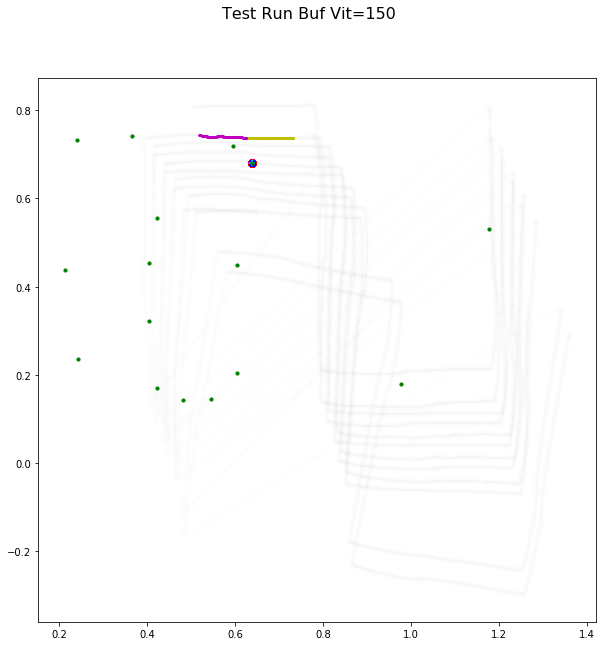

In [16]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  #Modelo 2 uses obs2
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=150', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 , )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='m',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=1)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [17]:



buf_vit=60
for i in range(1):
    
    
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))

10135
1.0 1.0


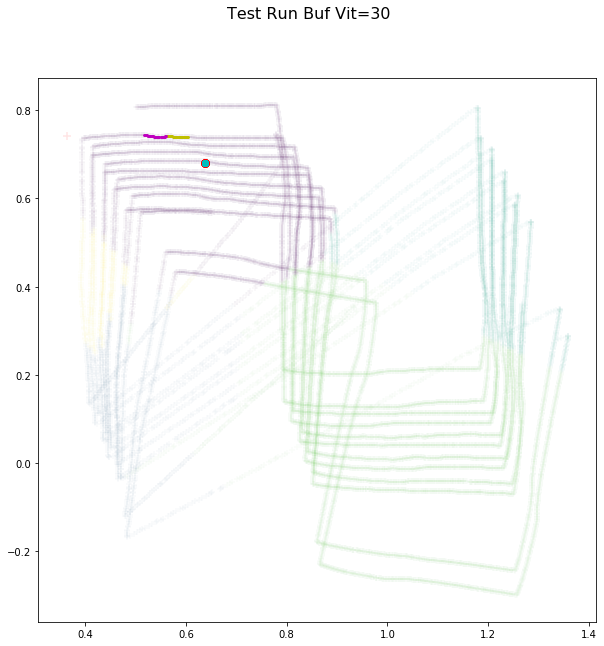

In [18]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=30', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='r',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='c' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')



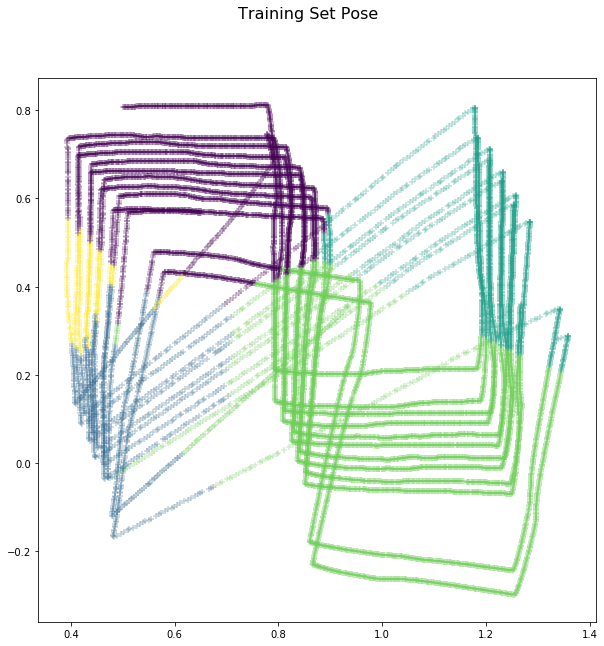

In [19]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Pose', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.3)


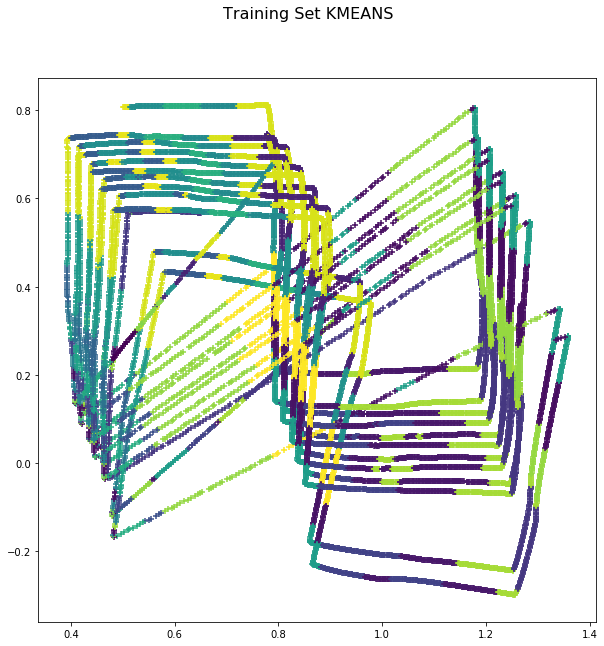

In [20]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk)


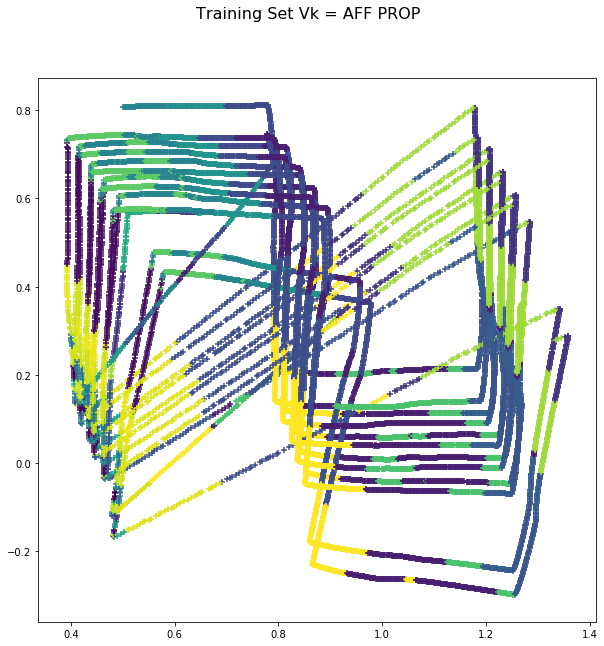

In [21]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Vk = AFF PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff)


In [22]:
data

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Vk_aff,Y,Vk
0,1.439873,1.457068,1.388784,1.368509,1.358870,1.350896,1.345730,1.342129,1.338672,1.335278,...,1.479520,1.485237,1.491049,1.496958,0.500674,0.807243,0.077393,82,6,242
1,1.442690,1.459906,1.384591,1.367086,1.358375,1.350654,1.345837,1.342313,1.338853,1.335456,...,1.479231,1.484944,1.490752,1.496656,0.503185,0.807391,0.077203,82,6,242
2,1.446273,1.463540,1.380478,1.366086,1.357449,1.350385,1.345814,1.342292,1.338833,1.335438,...,1.479275,1.484990,1.490800,1.496706,0.503965,0.807437,0.077207,82,6,242
3,1.449046,1.466336,1.379191,1.365638,1.356969,1.350382,1.345989,1.342464,1.339003,1.335605,...,1.479046,1.484757,1.490563,1.496466,0.504874,0.807432,0.076945,82,6,242
4,1.451882,1.469199,1.377713,1.365083,1.356489,1.350321,1.346124,1.342596,1.339134,1.335734,...,1.478857,1.484565,1.490369,1.496269,0.506435,0.807583,0.076968,82,6,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16631,1.347475,1.361564,1.375997,1.390788,1.405948,1.421492,1.437433,1.453785,1.470564,1.487786,...,1.693726,1.699522,1.705416,1.711410,1.266699,0.352460,-0.051533,156,11,14
16632,1.347509,1.361600,1.376035,1.390828,1.405991,1.421536,1.437479,1.453834,1.470616,1.487840,...,1.691278,1.697067,1.702953,1.708938,1.266800,0.354687,-0.051569,156,11,14
16633,1.347528,1.361621,1.376058,1.390852,1.406017,1.421564,1.437509,1.453866,1.470649,1.487876,...,1.688808,1.694589,1.700467,1.706444,1.266922,0.357218,-0.051528,156,11,14
16634,1.347431,1.361521,1.375957,1.390751,1.405914,1.421460,1.437403,1.453758,1.470540,1.487766,...,1.686295,1.692067,1.697936,1.703904,1.266975,0.358297,-0.051513,156,11,14


In [23]:
graphe= Markov_A_2_grafo(A,ccxyth)
ruta=dijkstra(0,6,graphe)


RUTA CALCULADA 


In [24]:

def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


In [25]:
graphe= Markov_A_2_grafo(A,ccxyth)


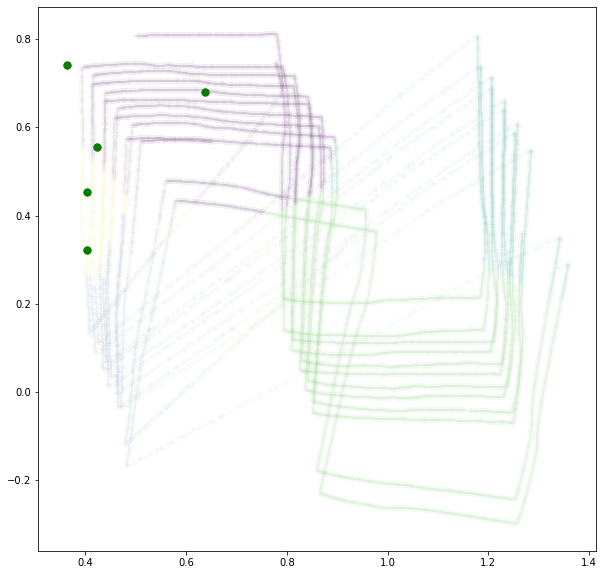

In [26]:
#ruta.append(nodofinal)
path=np.array(ruta)
path
cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)

cords_path2= path_to_xy(path,cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52 )


In [27]:

def dijkstra(nodoinicial,nodofinal,graphe):
    if (nodofinal > graphe.nodos.shape[0]):
        print ('Wrong dimensions for requested node')
        return None

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


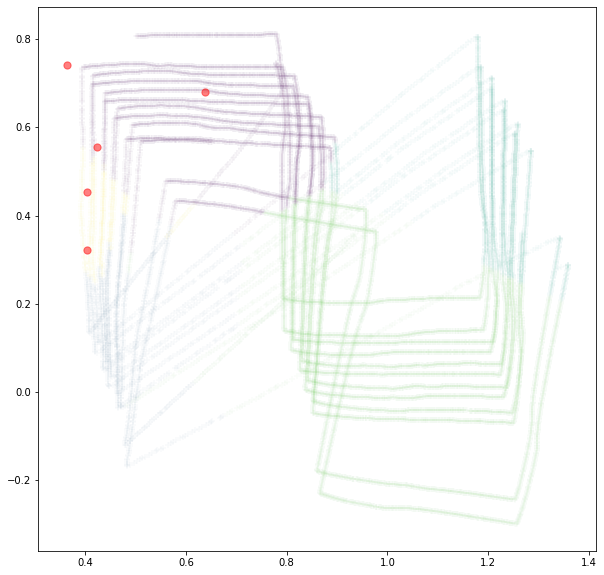

In [28]:
path=np.array(ruta)


cords_path= path_to_xy(path,cc)
#cords_path= path_to_xy(path[:int(len(path)/2)],cc)
#cords_path2= path_to_xy(path[int(len(path)/2):],cc)



fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords_path.xcuant, y=cords_path.ycuant, marker='o',c='r',s=52,alpha=.5 )
#ax1.scatter(x=cords_path2.xcuant, y=cords_path2.ycuant, marker='o',c='g',s=52,alpha=.5 )

In [29]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 236)

236


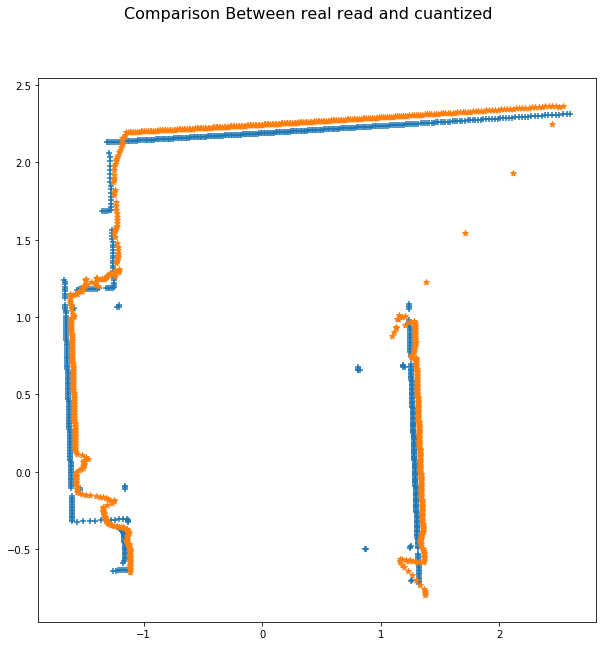

In [30]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [31]:
lecs=data[data.Vk==lec_leida]
lecs.shape

(1378, 727)

In [32]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

236


236


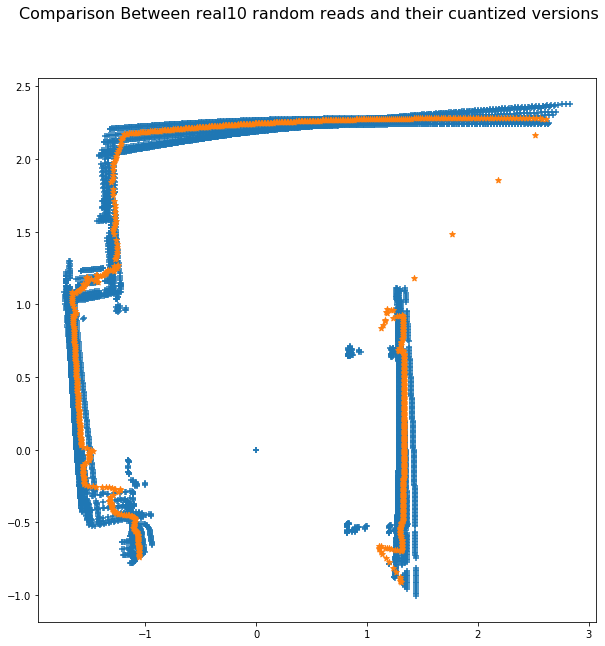

In [33]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [34]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())


 
lec_deseada=aux.index[4]   ###CHOOSING 5th MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 218)

218


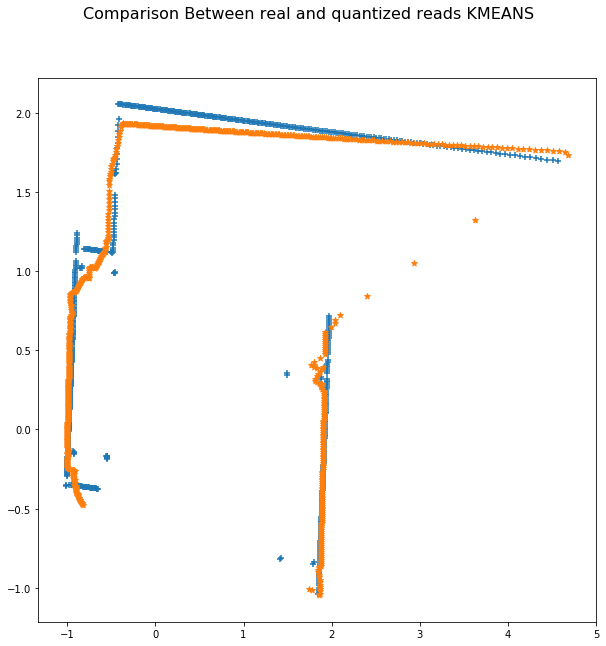

In [35]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin())
lec_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real and quantized reads KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*')

In [36]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk==lec_leida].sample(n=10,axis=0 , replace=True).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

218


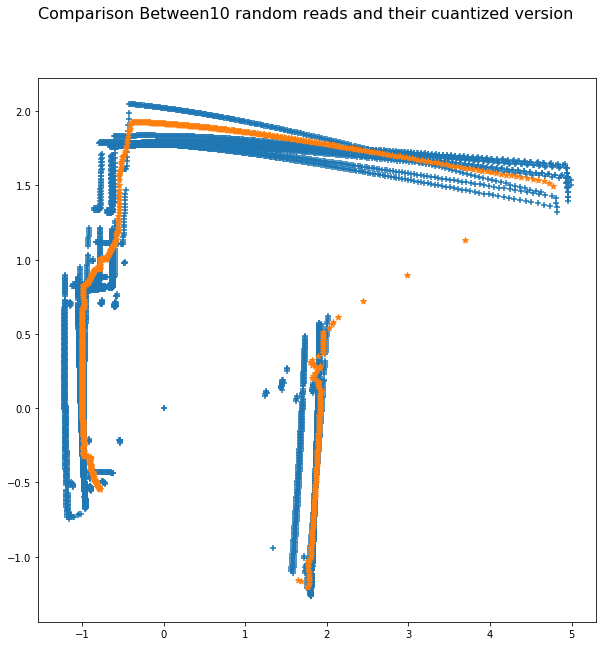

In [37]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between10 random reads and their cuantized version ' , fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')

In [38]:
############################################################################################


In [39]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 16)

COMPARING AFF PROP READINGS NO centroid
16


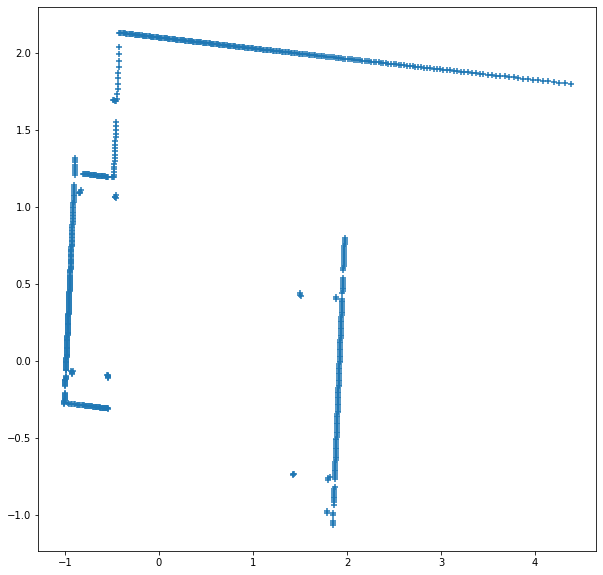

In [40]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [41]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

16


16


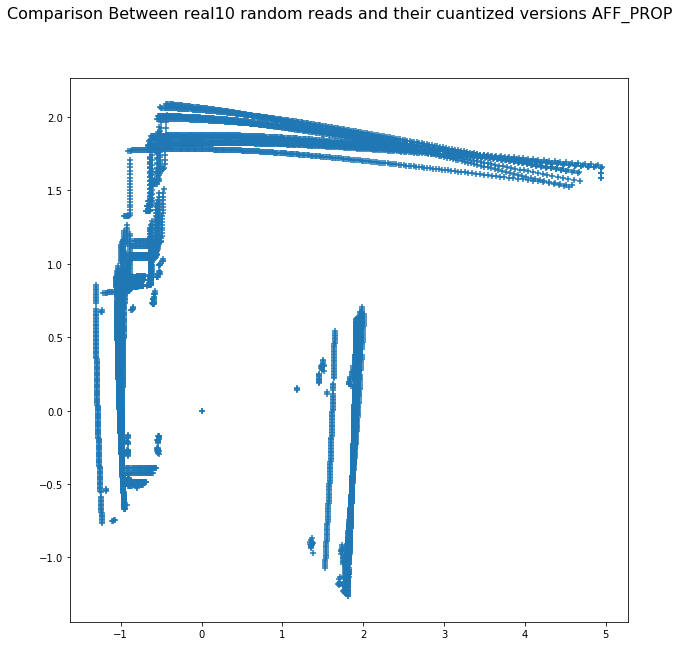

In [42]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

In [43]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk_aff.value_counts())



lec_deseada=aux.index[3]   ###CHOOSING 3rd MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk_aff==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 156)

COMPARING AFF PROP READINGS NO centroid
156


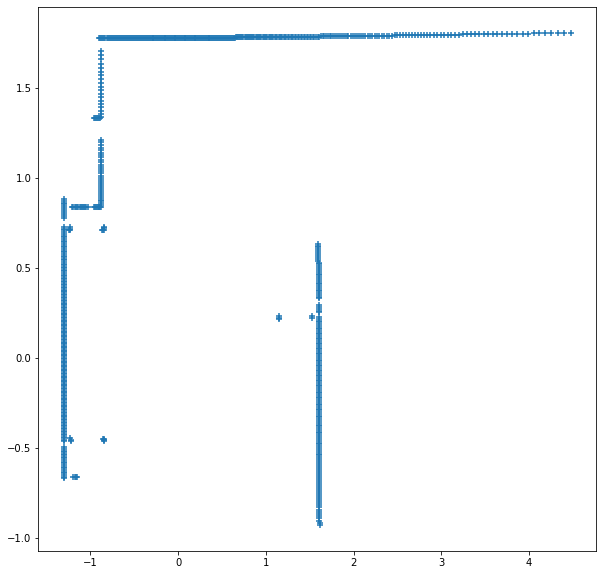

In [44]:
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
print("COMPARING AFF PROP READINGS NO centroid")

lec_leida= (int)( clf.predict(lec.reshape(1, -1)))
print(lec_leida)

fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')


In [45]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

156


156


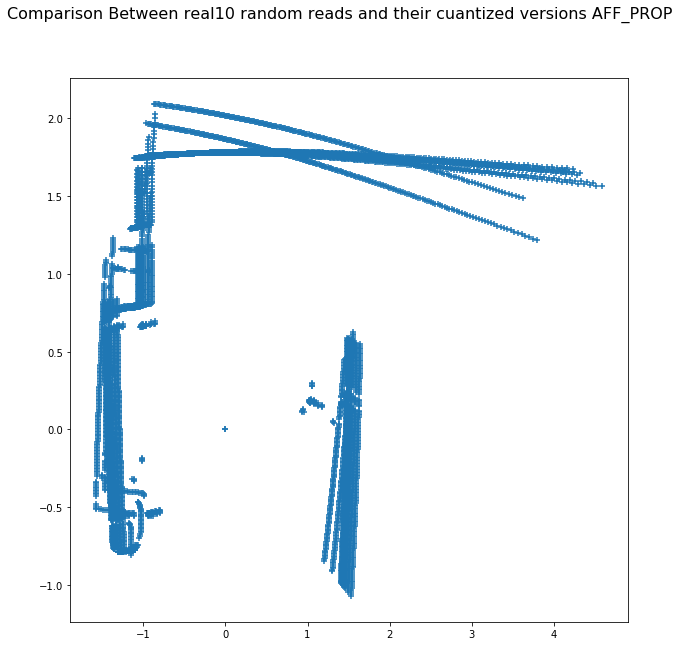

In [46]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=['x','y']

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real10 random reads and their cuantized versions AFF_PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')

print(lec_leida)

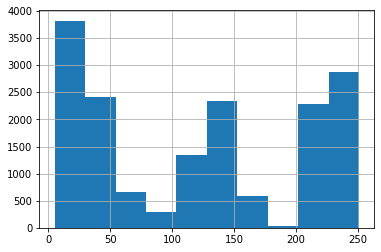

In [47]:
data.Vk.hist()

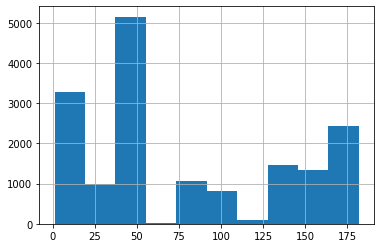

In [48]:
data.Vk_aff.hist()

(<matplotlib.collections.PathCollection at 0x7fd1edd61d68>,
                  x            y      Vk            Y
 count  1378.000000  1378.000000  1378.0  1378.000000
 mean      0.839667     0.560569   236.0     7.901306
 std       0.071780     0.138107     0.0     3.016365
 min       0.642120     0.190883   236.0     6.000000
 25%       0.790640     0.471213   236.0     6.000000
 50%       0.846159     0.581530   236.0     6.000000
 75%       0.888452     0.661371   236.0    11.000000
 max       0.978196     0.811168   236.0    13.000000)

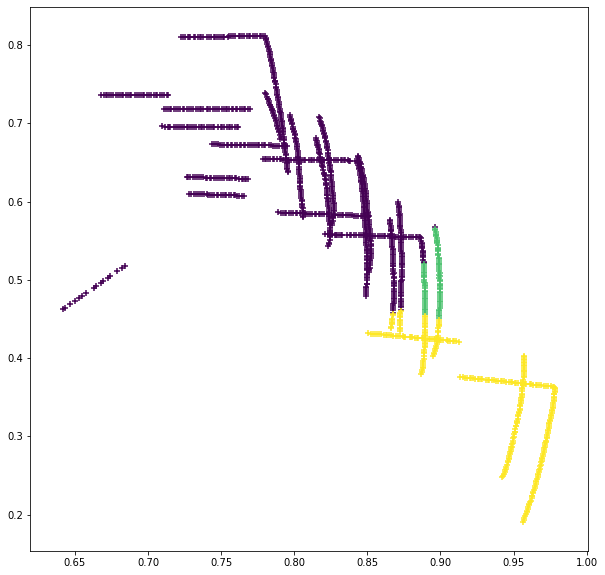

In [49]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','Vk','Y']][data.Vk==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7fd1d13136a0>,
                  x            y        theta           Vk            Y
 count  4049.000000  4049.000000  4049.000000  4049.000000  4049.000000
 mean      1.016050     0.232758    -0.097388   101.561373    11.126451
 std       0.188702     0.278530     0.146468    97.025580     2.971009
 min       0.470818    -0.292393    -0.804947    21.000000     6.000000
 25%       0.866173     0.022621    -0.127848    21.000000     9.000000
 50%       1.034519     0.175825    -0.080629    44.000000    13.000000
 75%       1.194908     0.481869    -0.017416   236.000000    13.000000
 max       1.297243     0.811168     0.134264   236.000000    13.000000)

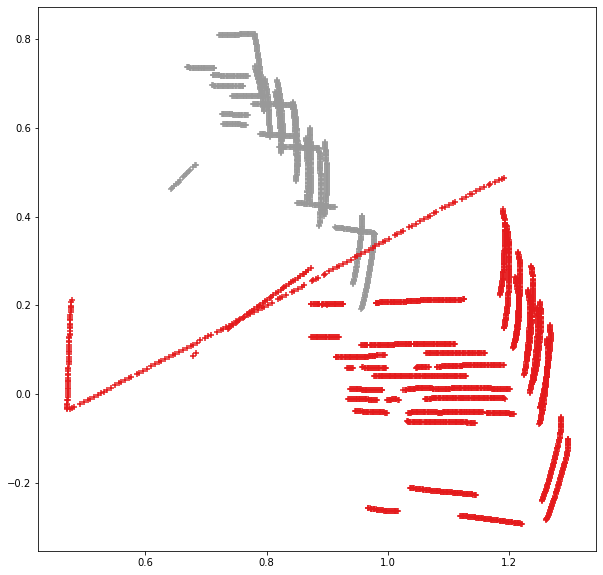

In [50]:
aux=pd.DataFrame(data.Vk.value_counts())
xy=data[['x','y','theta','Vk','Y']][data.Vk==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk','Y']][data.Vk==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk,marker='+',cmap='Set1'),xy.describe()

(<matplotlib.collections.PathCollection at 0x7fd1d12ef550>,
                  x            y  Vk_aff            Y
 count  1660.000000  1660.000000  1660.0  1660.000000
 mean      1.047623    -0.000954    16.0    12.973494
 std       0.094349     0.140199     0.0     0.228782
 min       0.672348    -0.292393    16.0    11.000000
 25%       0.976085    -0.044087    16.0    13.000000
 50%       1.054081     0.012832    16.0    13.000000
 75%       1.114156     0.091157    16.0    13.000000
 max       1.305427     0.385758    16.0    13.000000)

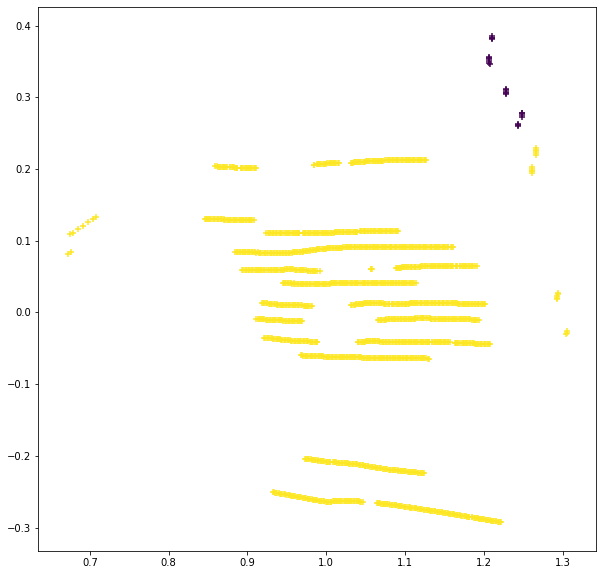

In [51]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','Vk_aff','Y']][data.Vk_aff==(aux.index[0]  ) ]
CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+', c=CORDS.Y),xy.describe()

(<matplotlib.collections.PathCollection at 0x7fd1d12557f0>,
                  x            y        theta       Vk_aff            Y
 count  4823.000000  4823.000000  4823.000000  4823.000000  4823.000000
 mean      0.902956     0.270331    -0.052095    33.076716    10.982998
 std       0.131579     0.269355     0.080505    12.398837     3.093209
 min       0.594858    -0.292393    -0.623547    16.000000     6.000000
 25%       0.815212     0.060133    -0.096147    16.000000     6.000000
 50%       0.872022     0.266975    -0.041313    41.000000    13.000000
 75%       0.982475     0.479516    -0.001572    43.000000    13.000000
 max       1.305427     0.811168     0.146079    43.000000    13.000000)

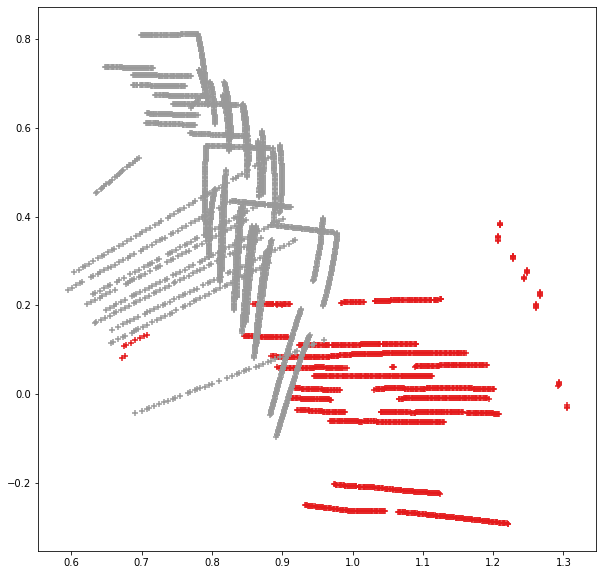

In [52]:
aux=pd.DataFrame(data.Vk_aff.value_counts())
xy=data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[0]]
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[1]])
xy= xy.append(data[['x','y','theta','Vk_aff','Y']][data.Vk_aff==aux.index[2]])


CORDS=xy
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y, c=CORDS.Vk_aff,marker='+',cmap='Set1'),xy.describe()

In [53]:
aux=pd.DataFrame(data.Vk.value_counts())
cents=[]
for i in aux.index[:3]:
    print (data[data.Vk==i][['x','y','theta']].describe())
    cents.append(data[data.Vk==i][['x','y','theta']].mean(axis=0))

aux=pd.DataFrame(data.Vk_aff.value_counts())
cents_aff=[]
for i in aux.index[:3]:
    print (data[data.Vk_aff==i][['x','y','theta']].describe())
    cents_aff.append(data[data.Vk_aff==i][['x','y','theta']].mean(axis=0))

                 x            y        theta
count  1378.000000  1378.000000  1378.000000
mean      0.839667     0.560569    -0.001973
std       0.071780     0.138107     0.071398
min       0.642120     0.190883    -0.163896
25%       0.790640     0.471213    -0.047582
50%       0.846159     0.581530     0.013966
75%       0.888452     0.661371     0.051968
max       0.978196     0.811168     0.134264
                 x            y        theta
count  1370.000000  1370.000000  1370.000000
mean      1.063715     0.008188    -0.093597
std       0.080703     0.127748     0.060566
min       0.678011    -0.292393    -0.423727
25%       0.999189    -0.041065    -0.121827
50%       1.074295     0.012818    -0.084428
75%       1.123921     0.091484    -0.052192
max       1.221484     0.213199     0.002353
                 x            y        theta
count  1301.000000  1301.000000  1301.000000
mean      1.152680     0.122026    -0.202441
std       0.210972     0.157648     0.191906
min       

In [54]:
cents_aff=np.asarray(cents_aff)

In [55]:
cents_aff

array([[ 1.04762320e+00, -9.54497261e-04, -1.05173462e-01],
       [ 8.27694363e-01,  2.66529095e-01, -3.95568777e-02],
       [ 8.26315853e-01,  5.70711455e-01, -7.68106821e-03]])

In [56]:
cents

[x        0.839667
 y        0.560569
 theta   -0.001973
 dtype: float64,
 x        1.063715
 y        0.008188
 theta   -0.093597
 dtype: float64,
 x        1.152680
 y        0.122026
 theta   -0.202441
 dtype: float64]

In [91]:
calc_trans=True

In [94]:
if calc_trans:
    for j in range (len(A)):
        for k in range (len(A)):
                print(j,k)
                prom=[]
                for i in range (len(data)-1):
                    if data.Y.iloc[i]==(int)(j) and data.Y.iloc[i+1]==(int)(k) and data.Y.iloc[i+1]!=j :
                        prom.append(data[['x','y','theta']].iloc[i])
                    trans[j,k]=np.asarray(prom).mean(axis=0)

In [85]:
trans[13,:]

array([[        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [ 0.49047269,  0.31579537, -0.78834063],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [ 0.67845476,  0.17669467, -0.09934756],
       [        nan,         nan,         nan],
       [ 1.2481095 ,  0.25587578, -0.09041629],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan]])

In [88]:
np.save('trans.npy',trans , allow_pickle=True)

In [90]:
np.load('trans.npy')[13,:]

array([[        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [ 0.49047269,  0.31579537, -0.78834063],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [ 0.67845476,  0.17669467, -0.09934756],
       [        nan,         nan,         nan],
       [ 1.2481095 ,  0.25587578, -0.09041629],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan],
       [        nan,         nan,         nan]])